In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import time
from datetime import datetime
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import sklearn.linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [ ]:
'''
Follow directions here to create an API to access the data hosted on 
the drive: https://pythonhosted.org/PyDrive/quickstart.html

Once the client_secrets.json file is in ./Marin Workspace/ run the code 
below just once
'''
gauth = GoogleAuth()
gauth.LocalWebserverAuth()

In [ ]:
'''
Run the following code to download the data using the file's ID
'''
SP500_sectors_filled = '1S6lRlfRRVJT2pH_fLBgX9ZbWjroD-DSZ'
drive = GoogleDrive(gauth)
data = drive.CreateFile({'id': all_stocks_5yr})
data.GetContentFile('SP500_sectors_filled.csv')

In [3]:
sp_filled = pd.read_csv('SP500_sectors_filled.csv')

In [4]:
def remove_nulls(df):
    '''
    Takes in a dataframe and returns a mutated dataframe with rows of missing data dropped.
    '''
    
    df.dropna(inplace=True)
    
    return df

In [5]:
sp_filled.head()

,date,open,high,low,close,volume,Name,per_change,Sector
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-0.021234,Industrials
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.028878,Industrials
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.012457,Industrials
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.025175,Industrials
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.063588,Industrials


In [6]:
sp_filled = remove_nulls(sp_filled)

In [7]:
sp_filled.isnull().sum()

date          0
open          0
high          0
low           0
close         0
volume        0
Name          0
per_change    0
Sector        0
dtype: int64

In [15]:
sp_filled.Sector.unique()

array(['Industrials', 'Information Technology', 'Consumer Discretionary',
       'Health Care', 'Consumer Staples', 'Utilities', 'Financials',
       'Real Estate', 'Materials', 'Energy', 'Telecommunication Services'], dtype=object)

In [16]:
industrials_df = sp_filled[sp_filled['Sector'] == 'Industrials']
information_technology_df = sp_filled[sp_filled['Sector'] == 'Information Technology']
consumer_discretionary_df = sp_filled[sp_filled['Sector'] == 'Consumer Discretionary']
health_care_df = sp_filled[sp_filled['Sector'] == 'Health Care']
consumer_staples_df = sp_filled[sp_filled['Sector'] == 'Consumer Staples']
utilities_df = sp_filled[sp_filled['Sector'] == 'Utilities']
financials_df = sp_filled[sp_filled['Sector'] == 'Financials']
real_estate_df = sp_filled[sp_filled['Sector'] == 'Real Estate']
materials_df = sp_filled[sp_filled['Sector'] == 'Materials']
energy_df = sp_filled[sp_filled['Sector'] == 'Energy']
telecommunication_services_df = sp_filled[sp_filled['Sector'] == 'Telecommunication Services']

In [20]:
real_estate_df.head(5)

,date,open,high,low,close,volume,Name,per_change,Sector
25180,2013-02-08,27.40,28.665,27.2675,28.57,1801890,AIV,0.042701,Real Estate
25181,2013-02-11,28.57,29.010,28.5700,28.92,2555514,AIV,0.012251,Real Estate
25182,2013-02-12,28.87,29.160,28.7800,29.16,1558832,AIV,0.010045,Real Estate
25183,2013-02-13,29.03,29.110,28.7050,28.90,773318,AIV,-0.004478,Real Estate
25184,2013-02-14,28.82,29.030,28.7550,28.97,990470,AIV,0.005205,Real Estate


In [19]:
def sort_tickers(df, name_column):
    
    tickers_sorted = sorted(set(df[name_column]))
    
    return tickers_sorted

In [21]:
def sort_dates(df, date_column):
    
    dates_sorted = sorted(set(df.index))
    
    return dates_sorted

In [28]:
#Real Estate Workflow

real_estate_tickers = sort_tickers(real_estate_df, 'Name')
df1 = real_estate_df[['Name', 'date', 'close']]
real_estate_dates = sort_dates(real_estate_df, 'date')
df1.index = [datetime.strptime(x, '%Y-%m-%d') for x in df1['date'].get_values()]
close_df1 = pd.DataFrame(columns=real_estate_tickers, index=real_estate_dates)
close_df1 = df1.pivot_table(('close'), ['date'], 'Name')
close_df1.index = pd.to_datetime(close_df1.index, format='%Y-%m-%d')

In [30]:
close_df1

Name,AIV,AMT,ARE,AVB,BXP,CBG,CCI,DLR,DRE,EQIX,...,PLD,PSA,REG,SBAC,SLG,SPG,UDR,VNO,VTR,WY
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,28.57,77.06,72.62,128.84,105.14,24.19,70.79,65.40,16.07,219.710,...,39.47,157.40,51.41,69.490,81.89,162.76,23.60,84.51,67.42,30.21
2013-02-11,28.92,76.38,72.73,129.78,105.29,24.13,70.03,65.21,15.86,218.030,...,39.33,156.85,51.20,69.280,81.79,163.50,23.81,84.80,67.70,30.14
2013-02-12,29.16,75.59,72.79,130.83,107.03,24.26,68.31,65.69,15.92,214.530,...,39.60,157.13,51.55,68.271,82.79,162.97,24.17,85.57,68.16,30.31
2013-02-13,28.90,74.00,72.36,130.23,107.18,24.50,68.04,65.50,15.96,213.020,...,39.47,156.08,51.57,67.450,82.76,162.05,24.30,85.59,68.11,30.48
2013-02-14,28.97,73.48,71.56,130.05,107.35,24.70,66.66,65.37,15.91,226.000,...,39.21,154.20,51.59,68.110,82.15,160.57,24.32,85.04,67.78,30.44
2013-02-15,29.12,75.18,71.62,130.26,107.21,24.28,67.90,63.65,15.83,224.530,...,38.84,151.26,51.70,68.690,82.70,159.90,24.45,84.89,69.47,30.65
2013-02-19,29.58,74.62,71.92,130.42,107.35,24.50,67.04,64.62,15.97,221.082,...,39.66,152.72,51.98,67.900,83.49,160.50,24.88,85.75,69.35,30.83
2013-02-20,29.70,73.95,71.86,129.69,106.52,23.84,67.13,65.97,15.75,215.620,...,39.18,152.46,51.81,67.730,82.16,159.52,24.95,84.88,69.58,29.78
2013-02-21,29.58,73.78,71.43,127.70,105.46,23.57,68.00,66.17,15.48,214.010,...,38.78,152.01,50.89,67.750,81.09,158.02,24.76,84.00,69.43,29.11


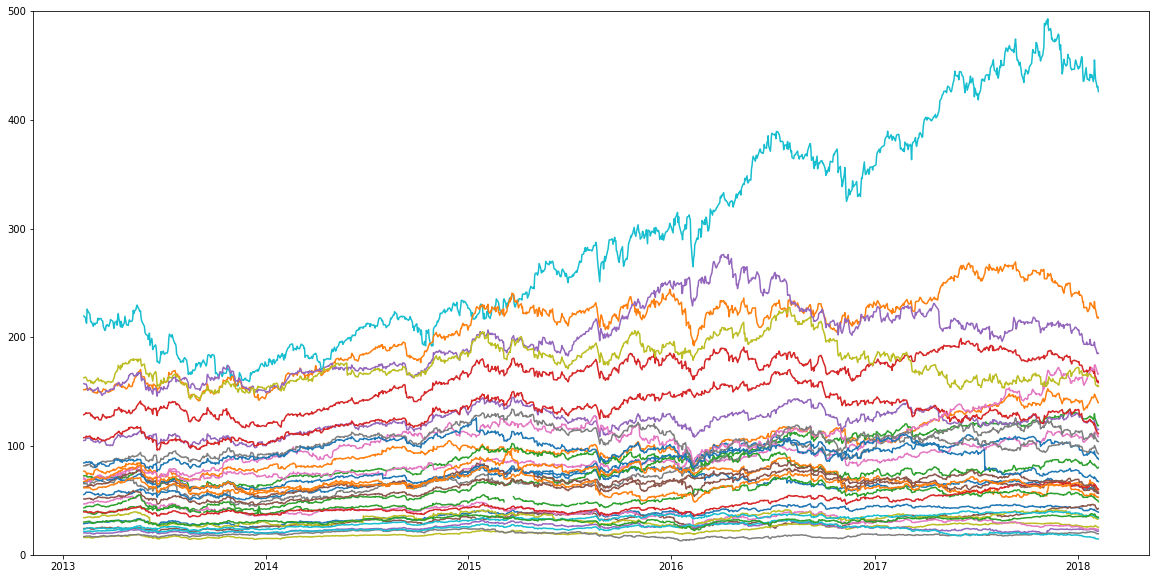

In [31]:
plt.figure(figsize=(20,10))
plt.plot(close_df1)
plt.ylim([0,500])
plt.show()

In [34]:
close_df1.dropna(inplace=True)

In [35]:
correlation = close_df1.corr()

In [36]:
correlation

Name,AIV,AMT,ARE,AVB,BXP,CBG,CCI,DLR,DRE,EQIX,...,PLD,PSA,REG,SBAC,SLG,SPG,UDR,VNO,VTR,WY
Name,,,,,,,,,,,,,,,,,,,,,
AIV,1.000000,0.848734,0.930333,0.944494,0.778791,0.631965,0.858826,0.890633,0.940151,0.899427,...,0.780952,0.785995,0.849601,0.716617,0.434416,0.495472,0.950719,0.075697,0.080623,0.442002
AMT,0.848734,1.000000,0.942264,0.789301,0.542934,0.737836,0.961277,0.914687,0.926204,0.934298,...,0.944354,0.532785,0.567857,0.909852,0.221920,0.106887,0.854189,-0.211298,0.017841,0.616033
ARE,0.930333,0.942264,1.000000,0.848273,0.671252,0.745340,0.927506,0.922142,0.960135,0.940735,...,0.915895,0.596321,0.669985,0.848604,0.348057,0.241499,0.892563,-0.083465,0.057502,0.588030
AVB,0.944494,0.789301,0.848273,1.000000,0.766293,0.666228,0.808470,0.802448,0.850293,0.833502,...,0.660845,0.851748,0.829695,0.700898,0.495523,0.520335,0.978459,0.109624,-0.009120,0.383172
BXP,0.778791,0.542934,0.671252,0.766293,1.000000,0.577685,0.566488,0.516896,0.646622,0.501999,...,0.443978,0.646669,0.796868,0.540545,0.816056,0.703814,0.713141,0.565096,0.295034,0.546535
CBG,0.631965,0.737836,0.745340,0.666228,0.577685,1.000000,0.693867,0.527987,0.583094,0.619058,...,0.610592,0.359109,0.359867,0.892158,0.553277,0.084463,0.705598,0.017089,-0.109134,0.666566
CCI,0.858826,0.961277,0.927506,0.808470,0.566488,0.693867,1.000000,0.913556,0.924347,0.936686,...,0.916346,0.620260,0.659702,0.876981,0.210251,0.214761,0.874245,-0.238207,0.009517,0.523681
DLR,0.890633,0.914687,0.922142,0.802448,0.516896,0.527987,0.913556,1.000000,0.962708,0.974529,...,0.916695,0.633202,0.666363,0.704608,0.072356,0.193450,0.848422,-0.236368,0.059506,0.440360
DRE,0.940151,0.926204,0.960135,0.850293,0.646622,0.583094,0.924347,0.962708,1.000000,0.954021,...,0.920466,0.659050,0.729565,0.753578,0.261818,0.298947,0.889174,-0.091104,0.113103,0.488230


([<matplotlib.axis.YTick at 0x1a301f19e8>,
 <a list of 33 Text yticklabel objects>)

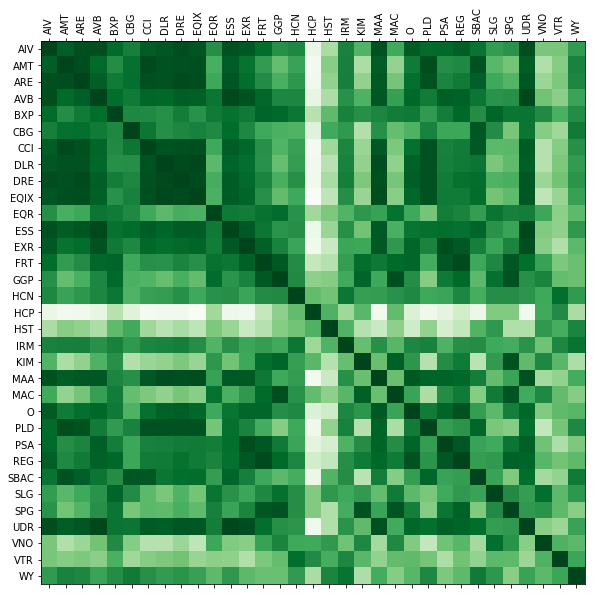

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(correlation, cmap=cm.get_cmap('Greens'))
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation='vertical')
plt.yticks(range(len(correlation.columns)), correlation.columns)

In [ ]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.cure import cure

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Z = linkage(close_df, 'ward')

In [ ]:
Z

In [ ]:
plt.figure(figsize=(25,10))
dendrogram(Z, leaf_rotation = 90., leaf_font_size=8.,)
plt.show()

In [ ]:
Z.shape